Since I am unable to manage whole database(due to Systems Limitations), I am taking top 1000 rows as the database to perform the analysis.

# Task 1 

Import all libraries and create store data into dataframes.

In [35]:
# A Imported all the required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# B Accessing the database 

df_schema = pd.read_csv(r'./Data/survey_results_schema.csv')
df_schema.describe()

,Column,QuestionText
count,129,129
unique,129,124
top,SurveyTooLong,"Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?"
freq,1,2


In [37]:
df_survey = pd.read_csv(r'./Data/survey_results_public.csv',nrows=1000)
pd.set_option('display.max_colwidth', 20)
df_survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,Bachelor’s degre...,Mathematics or s...,20 to 99 employees,Full-stack devel...,...,3 - 4 times per ...,Male,Straight or hete...,Bachelor’s degre...,Black or of Afri...,25 - 34 years old,Yes,NaN,The survey was a...,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,Bachelor’s degre...,A natural scienc...,"10,000 or more e...",Database adminis...,...,Daily or almost ...,Male,Straight or hete...,Bachelor’s degre...,White or of Euro...,35 - 44 years old,Yes,NaN,The survey was a...,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,Computer science...,20 to 99 employees,Engineering mana...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,Bachelor’s degre...,Computer science...,100 to 499 emplo...,Full-stack devel...,...,I don't typicall...,Male,Straight or hete...,Some college/uni...,White or of Euro...,35 - 44 years old,No,No,The survey was a...,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/uni...,Computer science...,"10,000 or more e...",Data or business...,...,3 - 4 times per ...,Male,Straight or hete...,Some college/uni...,White or of Euro...,18 - 24 years old,Yes,NaN,The survey was a...,Somewhat easy


In [38]:
# C

pd.options.display.max_colwidth = 300
df_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


The 10 columns which I find Interesting Are - 

1.) OpenSource - This column will tell us how many developers are contributing to open source community.

2.) Country - I find it interesting because it will help us to gather information about the demography of developers. Which                   country has most developers? Also if we plot combined with OpenSource we can have insight on which country                     contributes most to open source community.

3.) JobSatisfaction - Whether developers are satisfied with their jobs or not? If not, what is the percentage of developers not                       satisfied.

4.) CareerSatisfaction - Are developers around the world are satisfied with the career path they have taken?

5.) AssessJob6 - Does the enviroment they are going to work in weigh their decision to accept the job or not.

6.) AssessJob7 - Do they seek self-growth in the career?

7.) HoursComputer - This column is interesting because it will show us the amount of time Developers spent on a Computer                           Device. And if we combine it with Country column we can see in which country the work load is maximum.

8.) Exercise - How much developers spent on their health. Are they health conscious?

9.) EthicsChoice and EthicalImplications - This combined column can give insight on do developers write Unethical code for any                                            reason and if they does, how many of them connsider the implications of that code                                              they have written.

10.) Gender - Gender Equality is a big issue now-a-days. This column will give us percentage of male, female, transgenders.
              We can combine it with any of the above column to gain a perspective of how the gender played a role in decision making. For example - Are females more Ethical, or which country has gender equality in jobs, or Which of the gender is focused on exercising.

In [39]:
# So we will focus our Analysis on above 10 columns.

In [40]:
# D

#Create an Empty dictionary, KEYS will be Respondents and VALUES will be Parameters Stored i.e. NOT NULL Column values
data_dev = {}

for i in range(len(df_survey)) : 
    data_dev[df_survey.iloc[i].Respondent] = df_survey.iloc[i].notna().sum()
    
#IN OUTPUT you can respective respondents with their no. of parameters stored

data_dev
# below data show us how many columns (max. 129) are NotNULL for each developer record

{1: 111,
 3: 124,
 4: 17,
 5: 80,
 7: 120,
 8: 125,
 9: 125,
 10: 109,
 11: 125,
 16: 11,
 17: 15,
 18: 14,
 19: 15,
 20: 83,
 21: 112,
 22: 32,
 26: 52,
 27: 116,
 29: 64,
 31: 24,
 33: 125,
 34: 121,
 37: 111,
 38: 121,
 39: 79,
 41: 110,
 43: 118,
 44: 114,
 45: 38,
 46: 73,
 47: 126,
 50: 125,
 51: 111,
 52: 122,
 53: 77,
 54: 108,
 55: 107,
 56: 119,
 57: 17,
 59: 117,
 60: 38,
 61: 120,
 63: 74,
 66: 111,
 67: 102,
 71: 96,
 72: 126,
 75: 73,
 76: 75,
 77: 108,
 78: 12,
 79: 112,
 80: 17,
 81: 122,
 82: 35,
 83: 110,
 84: 52,
 85: 120,
 87: 119,
 88: 11,
 89: 115,
 90: 117,
 91: 108,
 92: 115,
 95: 76,
 96: 119,
 97: 19,
 98: 17,
 101: 18,
 103: 119,
 105: 117,
 106: 17,
 107: 104,
 111: 116,
 112: 32,
 113: 65,
 117: 102,
 118: 22,
 119: 119,
 120: 113,
 122: 123,
 123: 109,
 124: 125,
 125: 78,
 126: 110,
 127: 76,
 129: 121,
 131: 68,
 132: 17,
 133: 12,
 134: 113,
 135: 122,
 136: 13,
 137: 122,
 138: 17,
 140: 120,
 141: 72,
 142: 117,
 143: 39,
 146: 75,
 148: 123,
 149: 67

In [41]:
# E
# The 10 columns are - 
col = ['OpenSource','Country','JobSatisfaction','CareerSatisfaction','AssessJob6','AssessJob7','HoursComputer','Exercise','Gender','EthicalImplications']
 
for i in col:
    print(df_survey[i].describe(),"\n")

# Detailed Description for each column.

count     1000
unique       2
top         No
freq       568
Name: OpenSource, dtype: object 

count              1000
unique               84
top       United States
freq                227
Name: Country, dtype: object 

count                      838
unique                       7
top       Moderately satisfied
freq                       312
Name: JobSatisfaction, dtype: object 

count                      845
unique                       7
top       Moderately satisfied
freq                       318
Name: CareerSatisfaction, dtype: object 

count    712.000000
mean       4.304775
std        2.446865
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: AssessJob6, dtype: float64 

count    712.000000
mean       5.735955
std        2.944484
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: AssessJob7, dtype: float64 

count              762
unique               5
top       9 - 

From above data we can analyze that there are 84 unique entries in the Country Column. 37% developers are Moderately satisfied with their jobs and career. 599 developers out of 740 consider consider ethical implications of their code. Around 63% ( 633/1000) of them are male. Most of the developers spent 9-12 hours on computer and 37% don't exercise at all. Around 50% of developers don't contribute to open source.

# Task 2

We are currently taking single column - 'Converted Salary' for Analysis.

In [42]:
# A 
print(df_survey['ConvertedSalary'].dtype)

# So, the data type of ConvertedSalary is float64. 
# It contains Numeric Data

float64


B.)

ConvertedSalary column store the annual salaries in USD (salary converted using exchange rate).

In [43]:
# C
# checking whether Converted Salary contains Null values or not
df_survey['ConvertedSalary'].isna().sum()

#Since the Output is 449 that means Convertedsalary column contains Null Values and There are total of 449 null values in 1000 values.

449

In [44]:
# D
# removing NULL values and storing it in DataFrame df_sal_NonNa

df_sal_NonNa = df_survey[['ConvertedSalary']].dropna()

In [45]:
# There are no null values in df_sal_NonNa
df_sal_NonNa.isnull().sum()

ConvertedSalary    0
dtype: int64

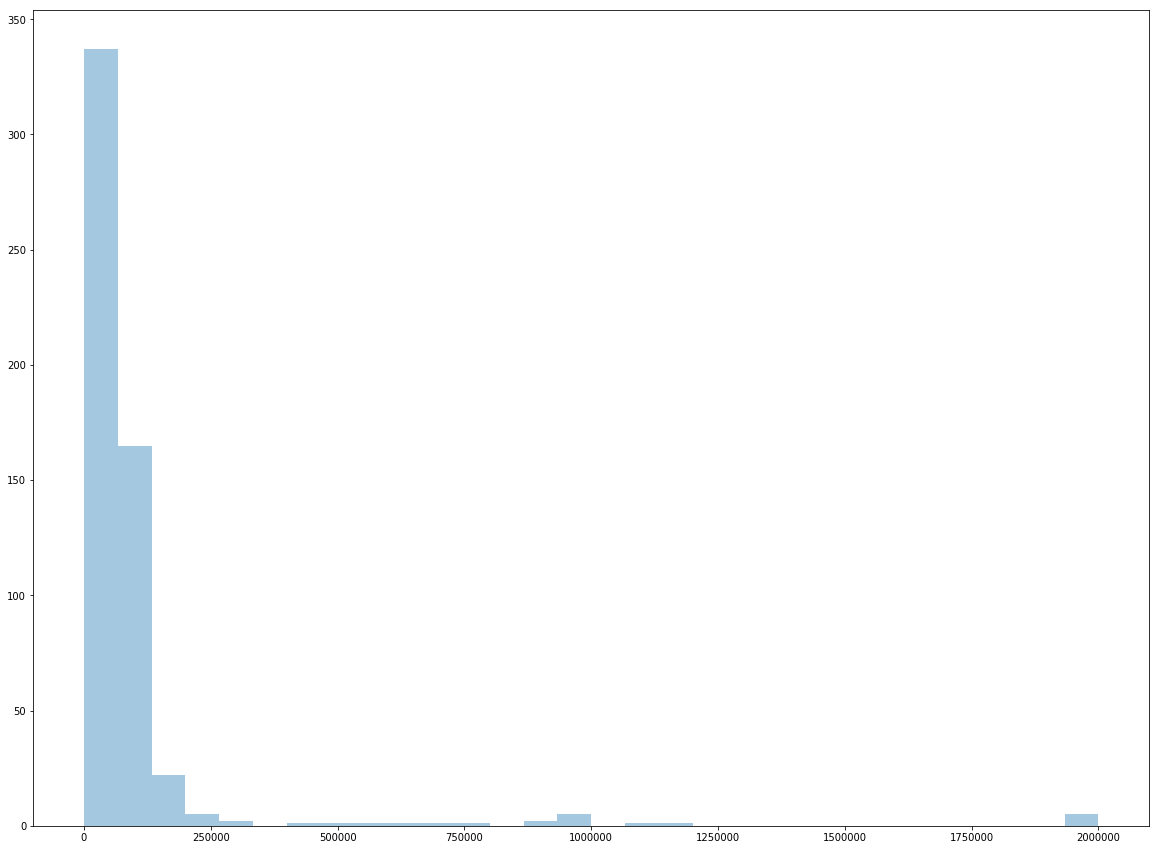

In [46]:
# E

# Histogram for df_sal_NonNa when bins=30
f,ax = plt.subplots(figsize=(20,15))
sns.distplot(df_sal_NonNa,bins=30,kde=False)

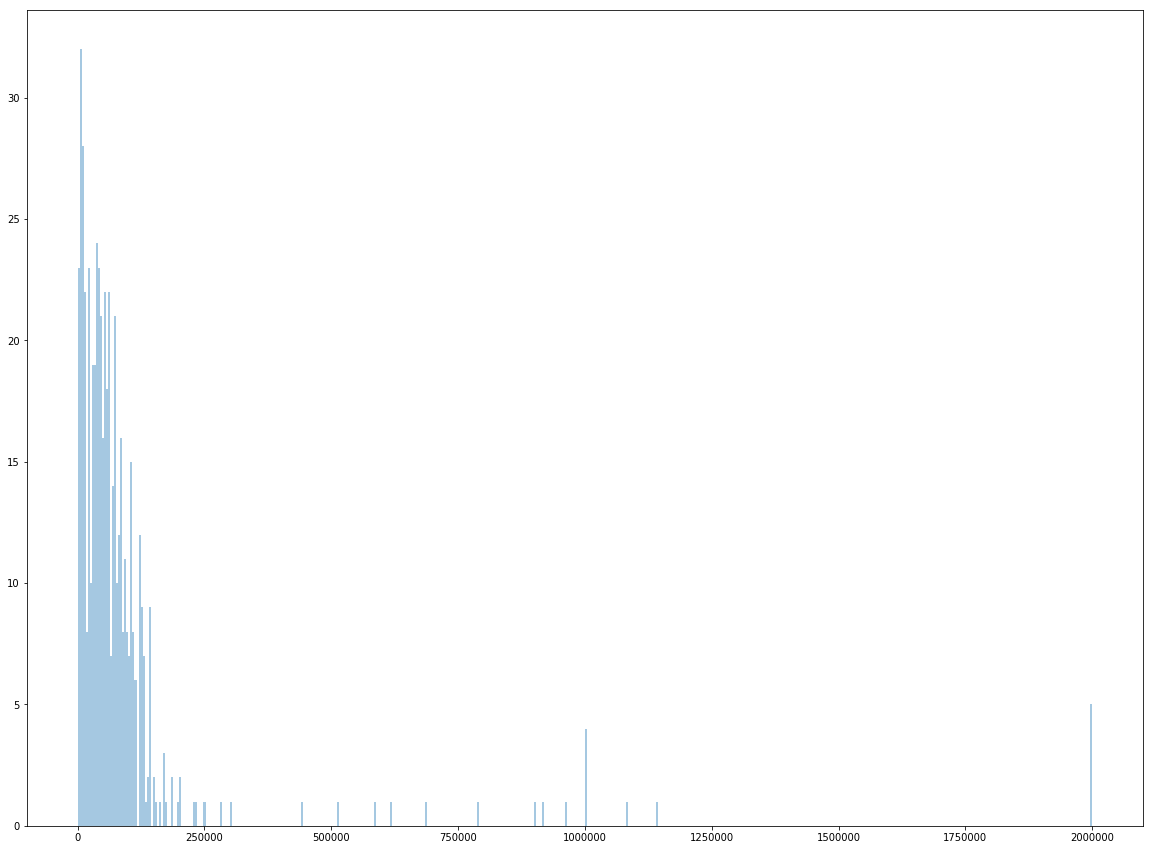

In [47]:
# Histogram for df_sal_NonNa having bins= 500

f,ax = plt.subplots(figsize=(20,15))
sns.distplot(df_sal_NonNa,bins=500,kde=False)

What can we summarize - 

When bins are 30 we don't see high peaks and variations in the graph. But when bins are 500 we can clearly see the peak data points.

There are less and less developers earning a amount higher than 250000.

In [48]:
# F
# Created a new dataframe df_sal_low where the ConvertedSalry is less than 250000 and not NULL
df_sal_low = df_sal_NonNa[df_sal_NonNa['ConvertedSalary']<=250000]

In [49]:
df_sal_low.head()

,ConvertedSalary
1,70841.0
4,21426.0
5,41671.0
6,120000.0
8,250000.0


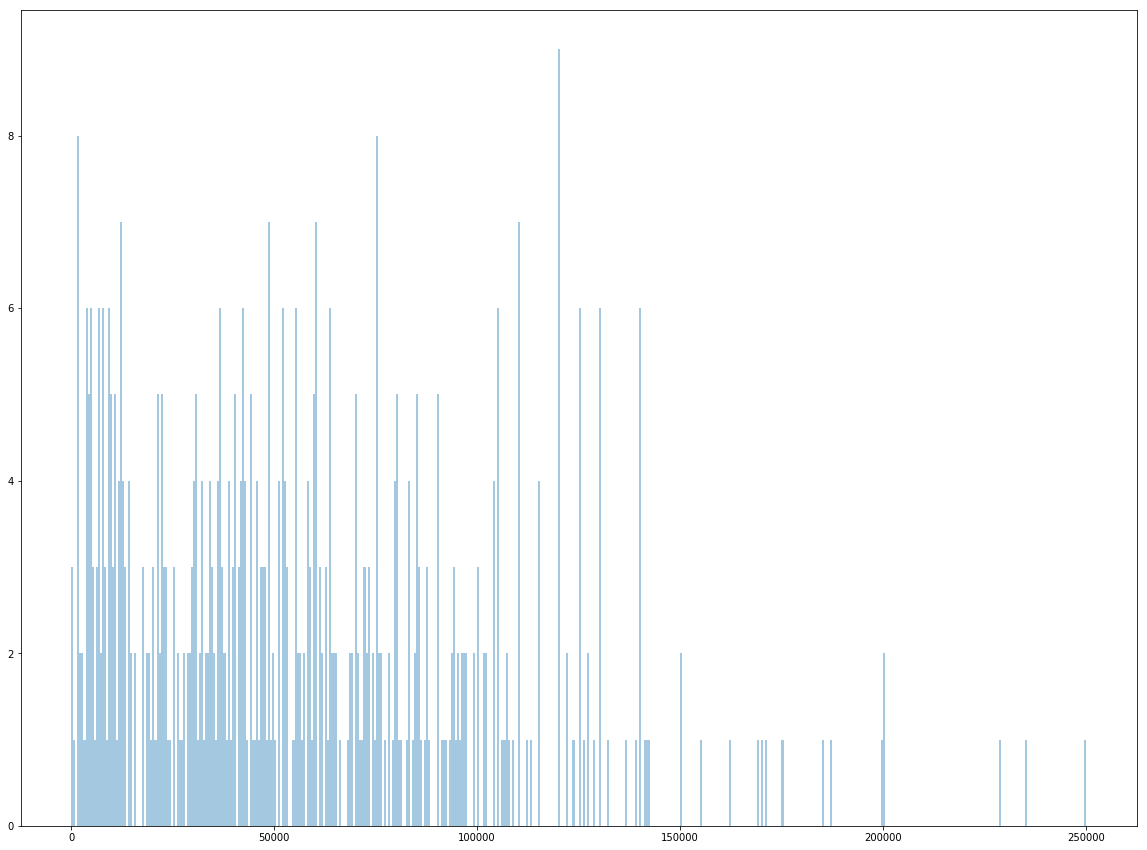

In [50]:
# Plotting Histogram for df_sal_low

fig,ax = plt.subplots(figsize=(20,15))
sns.distplot(df_sal_low,bins=500,kde=False)

So to summarize 

We are seeing the histogram for the ConvertedSalary less than 250000 but more clearly as compared to histograms plotted before. We can see most developers are paid < 100000 USD in salary.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


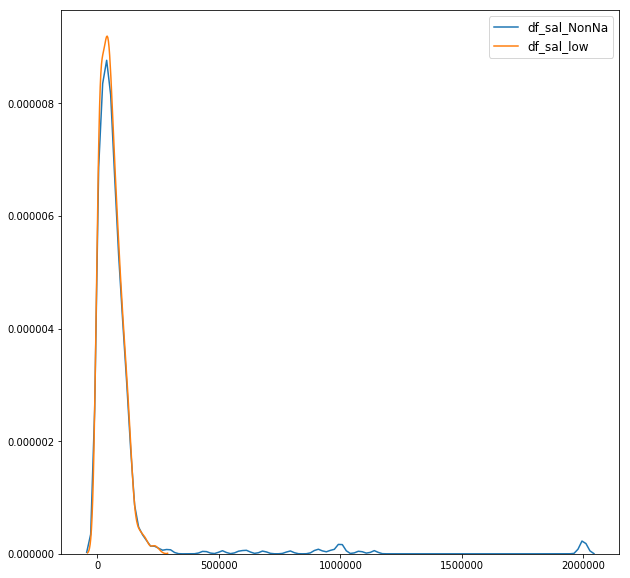

In [51]:
#G Plotting KDE Plot for df_sal_NonNa and df_sal_low

fig,ax = plt.subplots(figsize =(10,10))
sns.kdeplot(df_sal_NonNa['ConvertedSalary'], label = 'df_sal_NonNa')
sns.kdeplot(df_sal_low['ConvertedSalary'],label = 'df_sal_low')
plt.legend(fontsize = 'large')
plt.show()

# Task 3
Analysis on Multiple Columns

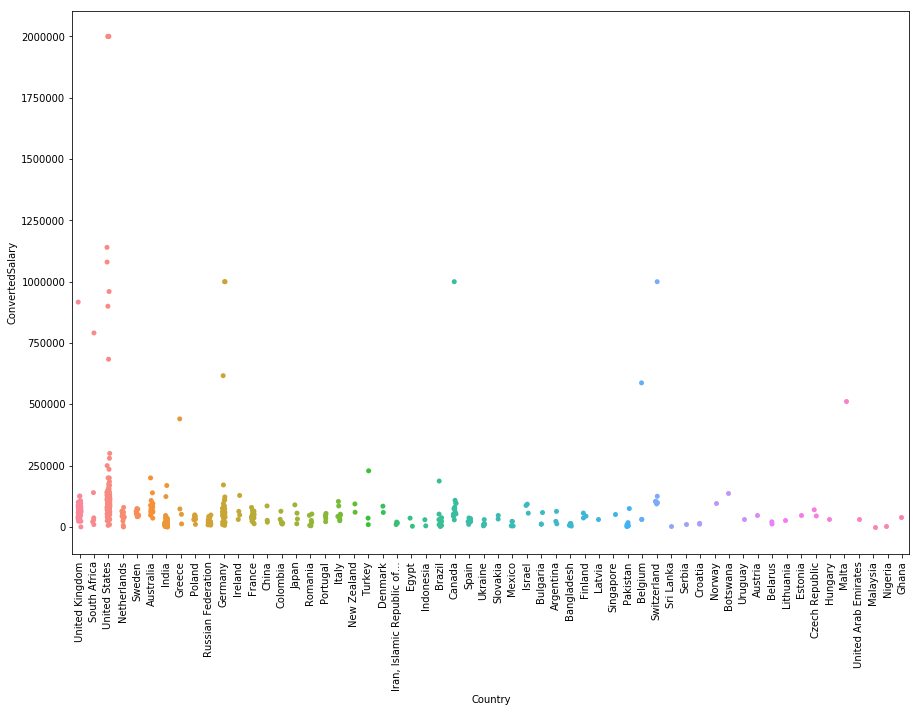

In [52]:
#A 

fig,ax = plt.subplots(figsize=(15,10))
df_sal_NonNa['Country'] = df_survey['Country'][df_sal_NonNa.index]
sns.stripplot(y='ConvertedSalary',x='Country',data=df_sal_NonNa)
plt.xticks(rotation=90)
plt.show()

United States has the highest salary.
Countries having the Lowest Salary can be Sri Lanka, Malaysia or any other. We cannot deetermine exactly.

In [53]:
# B
# top 5 countries from where users belong
top5 = df_sal_NonNa['Country'].value_counts().head(5)
top5

United States     155
India              60
United Kingdom     51
Germany            37
France             23
Name: Country, dtype: int64

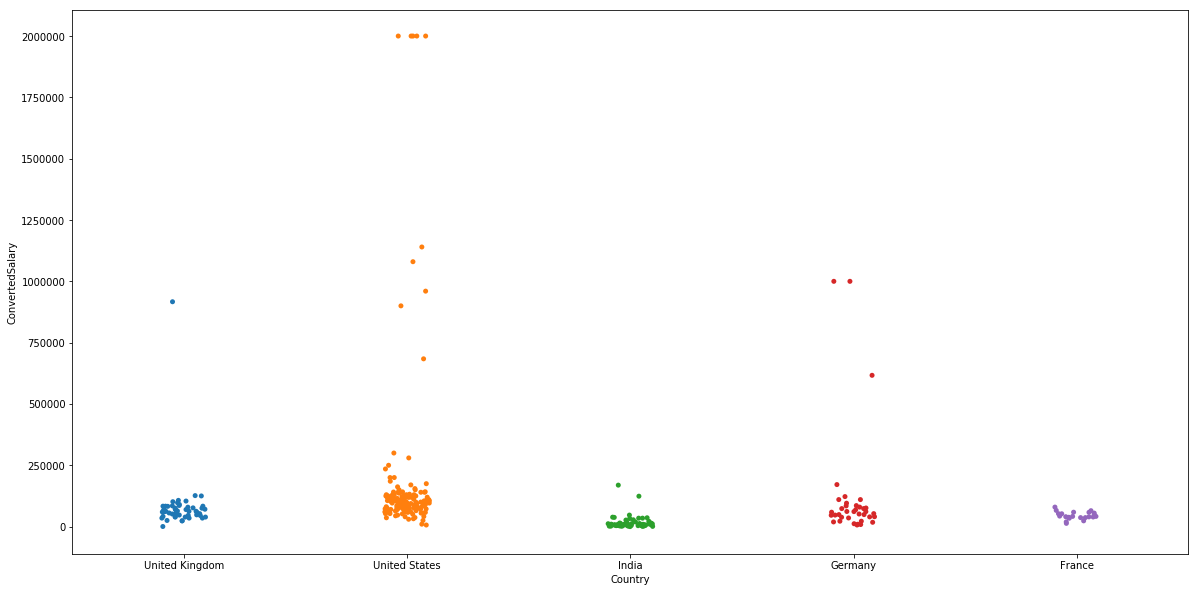

In [54]:
fig,ax = plt.subplots(figsize=(20,10))
top5  = ['United States','India','United Kingdom','Germany','France']
df_sal_NonNa2 = df_sal_NonNa[df_sal_NonNa['Country'].isin(top5)]
sns.stripplot(y=df_sal_NonNa2['ConvertedSalary'],x=df_sal_NonNa2['Country'])

Most developer belongs to United States.
The order of No. of Developers in decreasing order is - United States > India > United Kingdom > Germany > France

United States has developers in Highest Range of Salary.
All countries have developers in lowest range of salary.
France has evenly distributed salary range.
In India majority of the developers eran less than average salary. Or we can also say that no. of skilled developers in India are less.
In Germany, United Kingdom there are approximately same number of developers in each salary range.


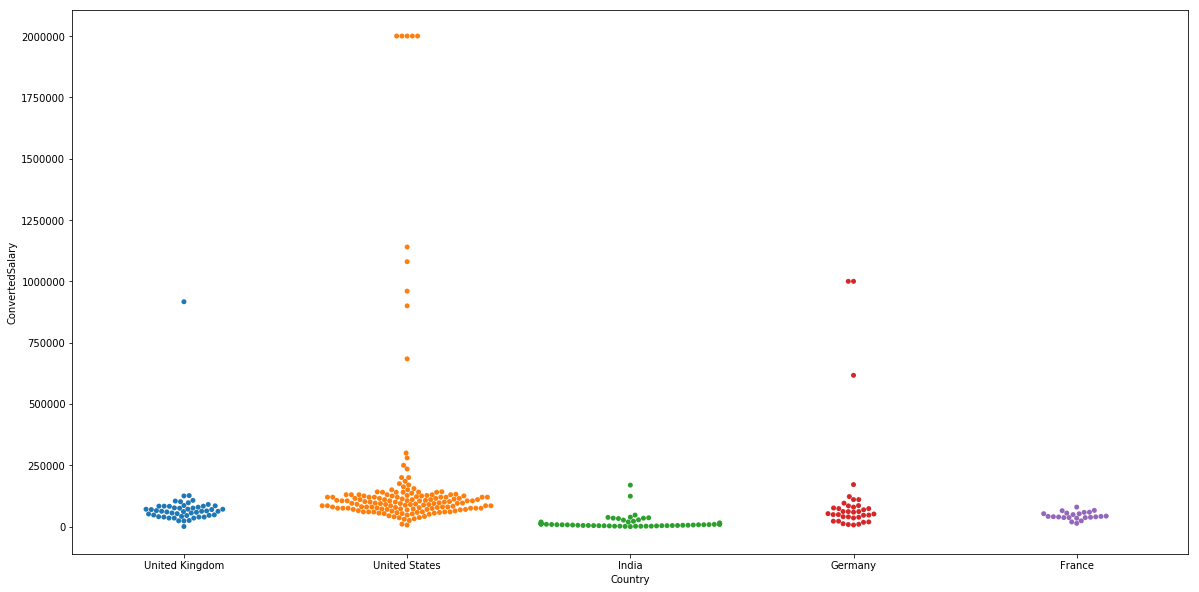

In [55]:
# C

fig,ax = plt.subplots(figsize=(20,10))
sns.swarmplot(y=df_sal_NonNa2['ConvertedSalary'],x=df_sal_NonNa2['Country'])

As to conclude -

In Swarmplot graph we can clearly see how the salary is distributed among developers in their respective country. In Stripplot we were only able to conclude the no. of developers.

If we look at above graph we can conclude that in India most of the develpors are have lowest salary. In United States the no. of developers gradually decrease as salary increase. Germany has same no. of developers even if salary increases.

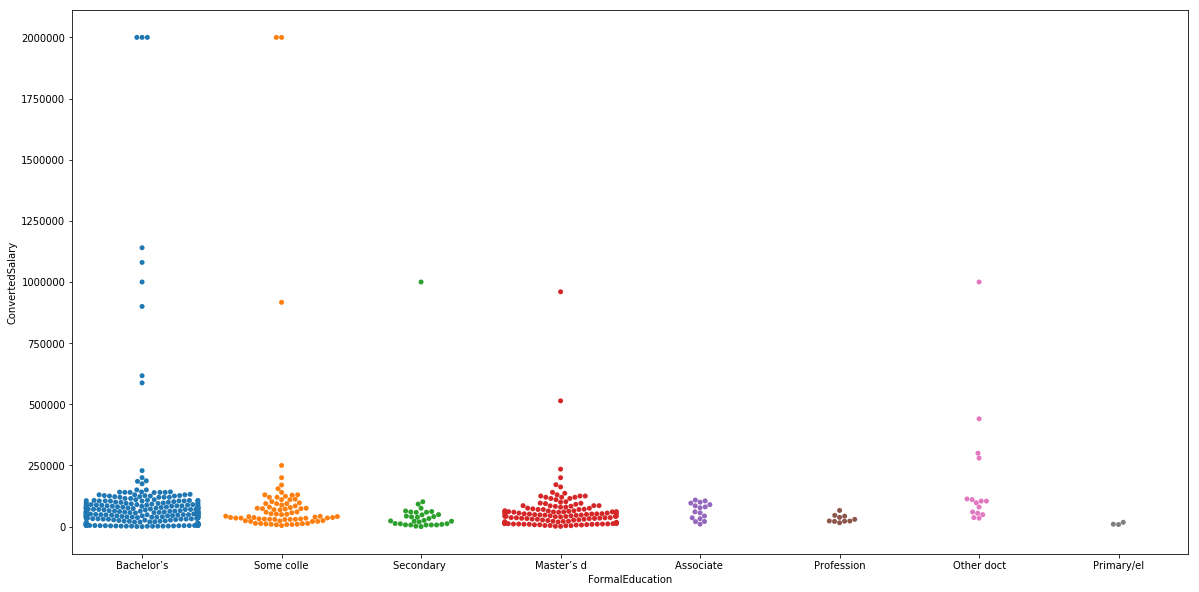

In [56]:
# A
# Graph between Degree and Salary.
fig,ax = plt.subplots(figsize=(20,10))
sns.swarmplot(y=df_sal_NonNa['ConvertedSalary'],x=df_survey['FormalEducation'][df_sal_NonNa.index].str[0:10])

'Bachelor's Degree' and 'Some College/University study without earning a degree' have developers in highest range.
Developers with low level of education such as primary, secondary. Salaries are distributed evenly for Bachelor's degree.

Most of the developers are Graduates or Post Graduates.
Some developers also go to College while working.

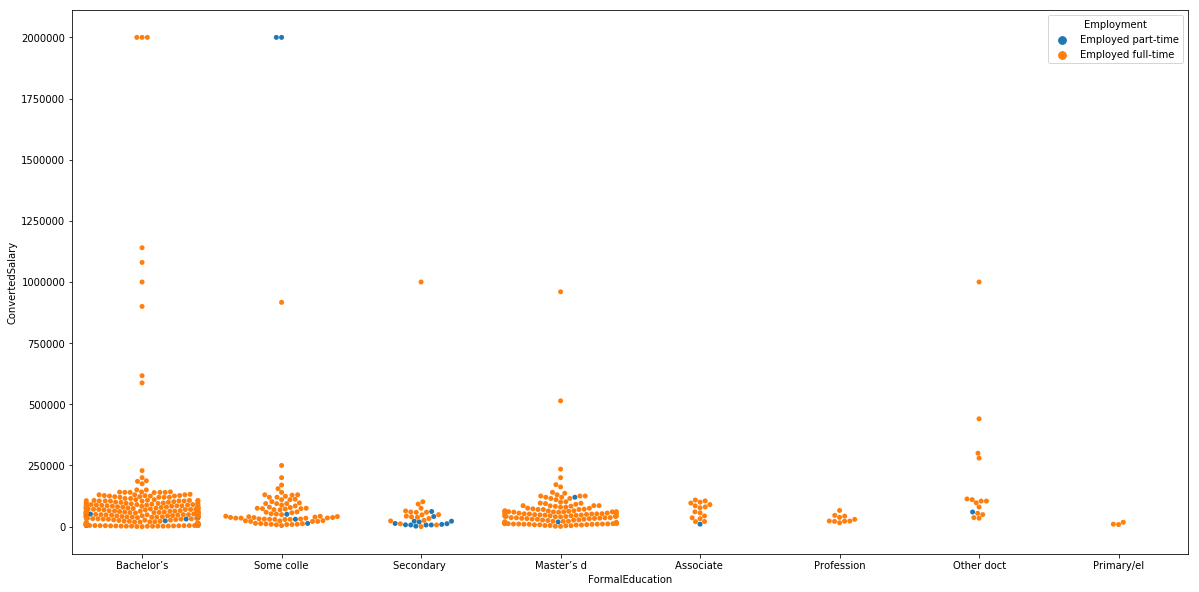

In [57]:
# B

fig,ax = plt.subplots(figsize=(20,10))
sns.swarmplot(y=df_sal_NonNa['ConvertedSalary'],x=df_survey['FormalEducation'][df_sal_NonNa.index].str[0:10],hue = df_survey['Employment'])

Most of the developers are full time developers.
Secondary school level developers has most percentage of part time developers. 

# Task5

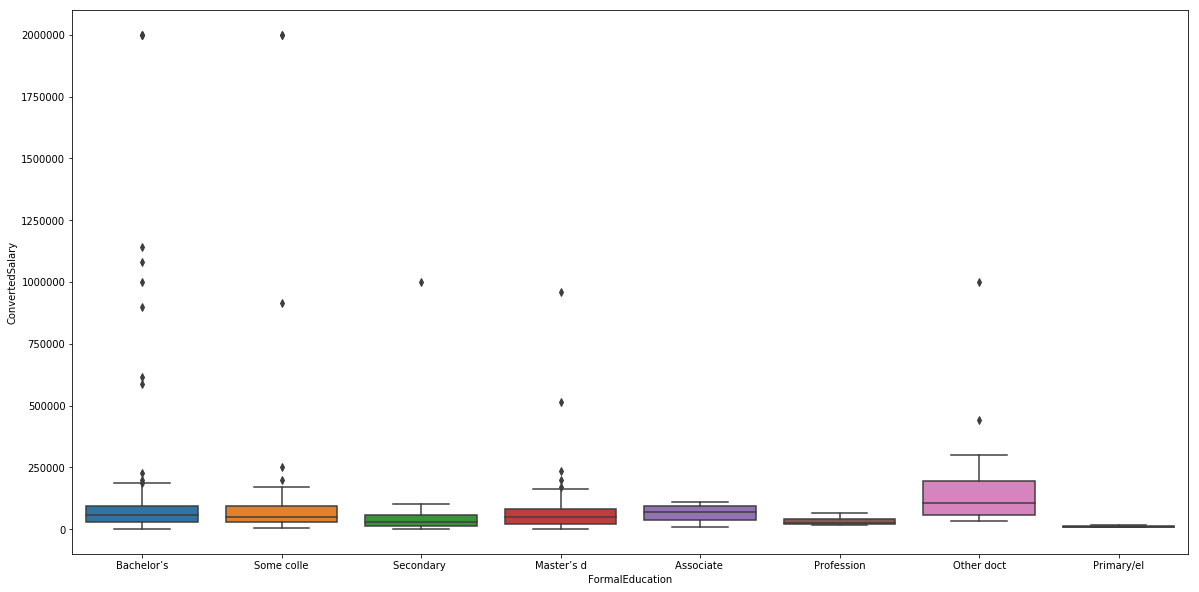

In [58]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(y=df_sal_NonNa['ConvertedSalary'],x=df_survey['FormalEducation'][df_sal_NonNa.index].str[0:10])

We can conclude from the above boxplot that the - Salary range for category 'Other Doctoral Degree' is largest among all. The 'Bachelor's Degree' have most outliers .The salary gap between the highest and median is also largest in 'bachelor's degree category'. The max average salary is 'Other Doctoral Degree'. The lowest salary range is of 'Primary/Elementary school' category.

# Task 6

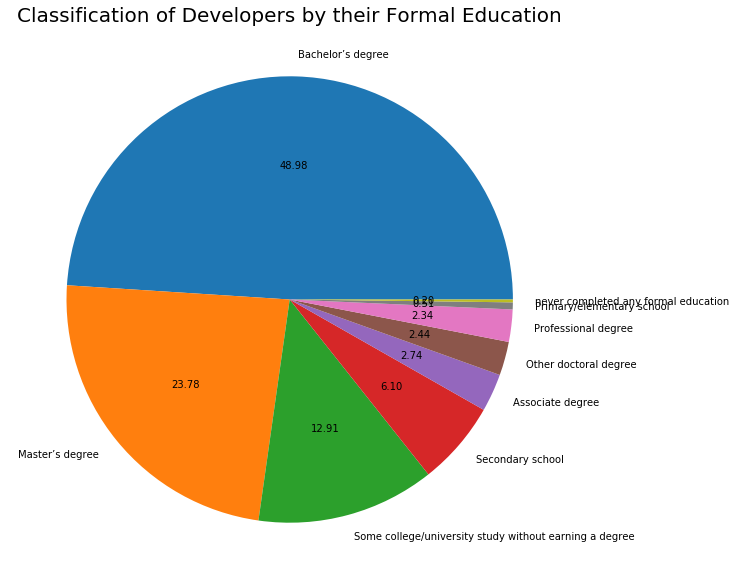

In [59]:
# A

labels = ['Bachelor’s degree','Master’s degree','Some college/university study without earning a degree','Secondary school','Associate degree',
         'Other doctoral degree','Professional degree','Primary/elementary school','never completed any formal education']

fig,ax = plt.subplots(figsize = (10,10))
plt.title('Classification of Developers by their Formal Education',fontsize=20)
plt.axis('equal')
# df_survey['FormalEducation'].value_counts()
plt.pie(x = df_survey['FormalEducation'].value_counts(),labels = labels,autopct='%.2f')
plt.show()

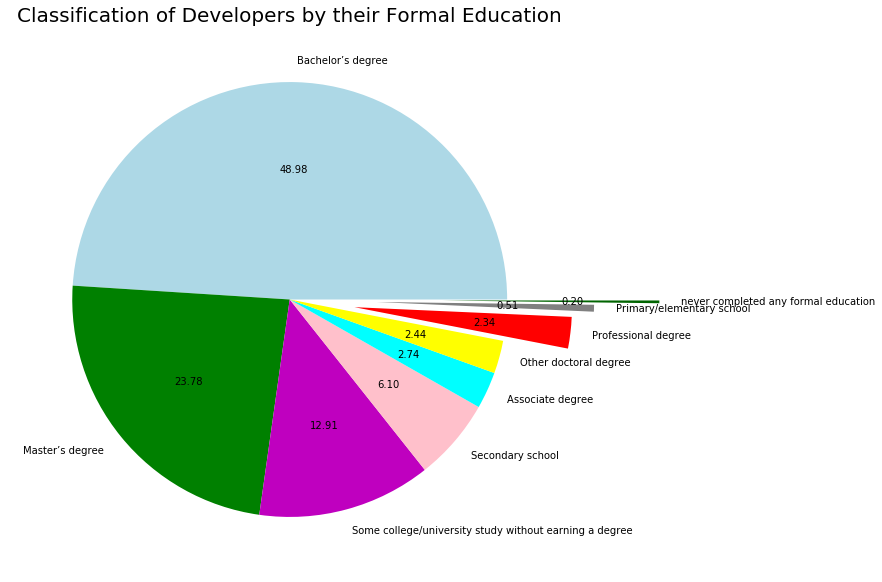

In [60]:
# B

colors = ['lightblue','g','m','pink','cyan','yellow','r','grey','darkgreen']
explode = (0,0,0,0,0,0,0.3,0.4,0.7)

fig,ax = plt.subplots(figsize = (10,10))
plt.title('Classification of Developers by their Formal Education',fontsize=20)
plt.axis('equal')
plt.pie(x = df_survey['FormalEducation'].value_counts(),labels = labels,autopct='%.2f',colors = colors,explode = explode)
plt.show()

# Once again the data used is of 1000 developers. 